In [9]:
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import cv2

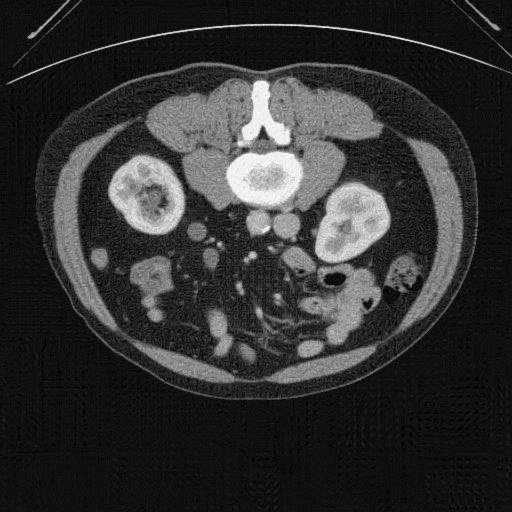

In [10]:
path = './data/Public_leaderboard_data/test1_images/51/10.png'
img = Image.open(path)
img.show()

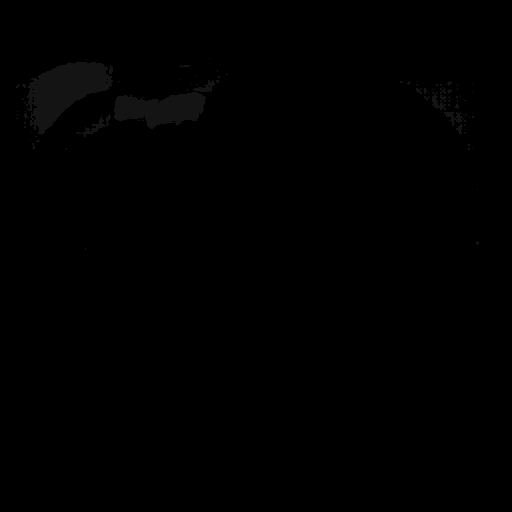

In [13]:
mask_path = './temp/val/51/10.png'

img = Image.open(mask_path)
arr = np.array(img)
# print(np.unique(arr))
arr = (arr > 0) * 20
mask_img = Image.fromarray(np.uint8(arr))
mask_img.show()

In [5]:
bbox_path = './data/Public_leaderboard_data/test1_bbox.txt'
        
bbox_dict = {}
with open(bbox_path) as f:
    for line in f:
        idx, box = line.split(':')
        ct, slice, organ = [part.strip() for part in idx.strip()[1:-1].split(',')]
        slice = int(slice)
        organ = int(organ)
        if (ct, slice) not in bbox_dict:
            bbox_dict[(ct, slice)] = {}

        x0, y0, x1, y1 = [int(part.strip()) for part in box.strip()[1:-1].split(',')]
        bbox_dict[(ct, slice)][int(organ)] = np.array([y0, x0, y1, x1])



4 [164 286 276 399]
9 [183 231 236 288]
11 [209 244 243 315]
8 [129 102 263 184]


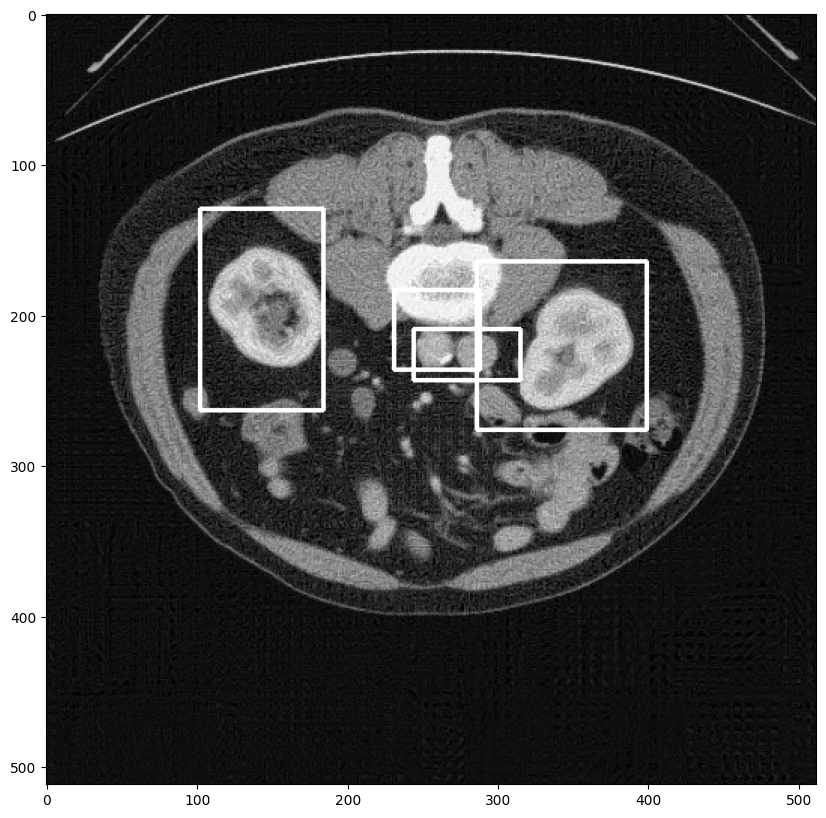

In [11]:
path = './data/Public_leaderboard_data/test1_images/51/10.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

for k, v in bbox_dict[('51', 10)].items():
    x1, y1, x2, y2 = v
    img = cv2.rectangle(img, (y1, x1), (y2, x2), (255, 0, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# noisy image
image_path = "data/Public_leaderboard_data/train_images/01/43.png"  
noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
 
 
if noisy_image is None:
    print("no image.")
else:
    # Non-Local Means Denoising
    # Bilateral Filtering for Edge Preservation
    denoised_image_NLMD = cv2.fastNlMeansDenoising(noisy_image, None, h=10, templateWindowSize=7, searchWindowSize=9)
    denoised_image_BFandNLMD = cv2.bilateralFilter(denoised_image_NLMD, d=9, sigmaColor=75, sigmaSpace=75)
    denoised_image_BF = cv2.bilateralFilter(noisy_image, d=9, sigmaColor=75, sigmaSpace=75)